<a href="https://colab.research.google.com/github/Navaneethp0/Cinema-Tickets/blob/main/Cinema_Tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd

In [26]:
data=pd.read_csv('/content/drive/MyDrive/cinemaTicket_Ref.csv')

In [27]:
data

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [28]:
data.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [29]:
data['date'] = pd.to_datetime(data['date'])

In [30]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month

In [31]:
data

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,2018
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,2018
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,2018
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,2018
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4,2018
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4,2018
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4,2018
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4,2018


In [32]:
data.dropna(axis=0,inplace=True)
data.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
year            0
dtype: int64

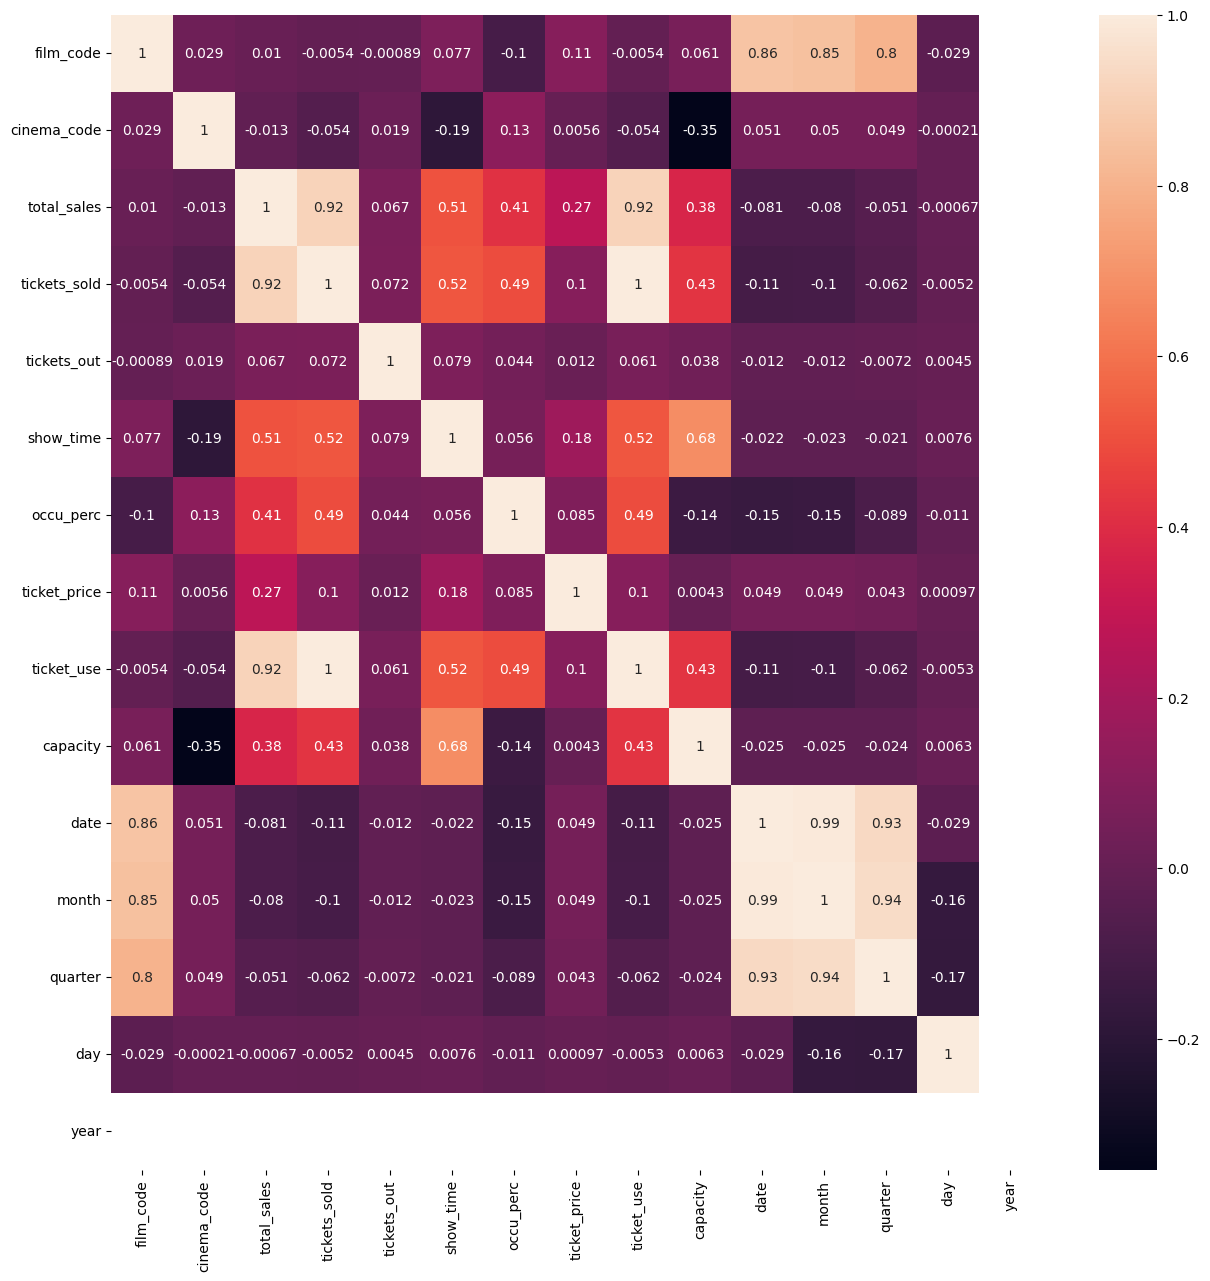

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

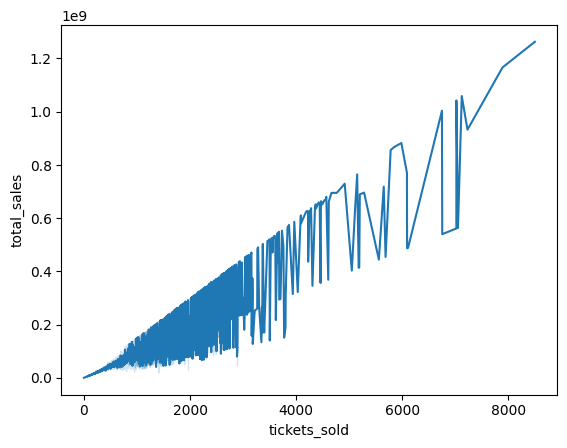

In [34]:
sns.lineplot(y=data['total_sales'],x=data['tickets_sold'])
plt.show()

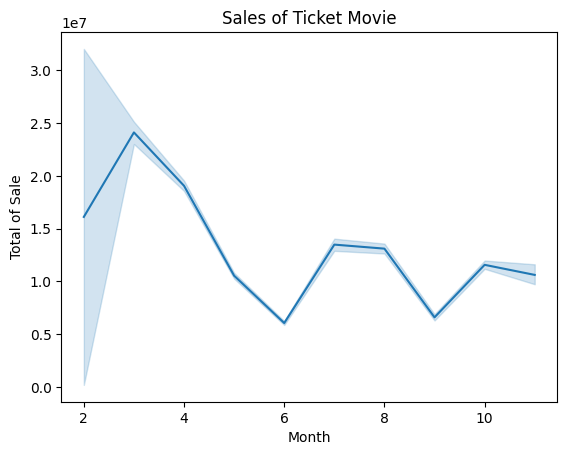

In [35]:
sns.lineplot(x=data['month'],y=data['total_sales'])

plt.title("Sales of Ticket Movie")
plt.xlabel("Month")
plt.ylabel("Total of Sale")

plt.show()

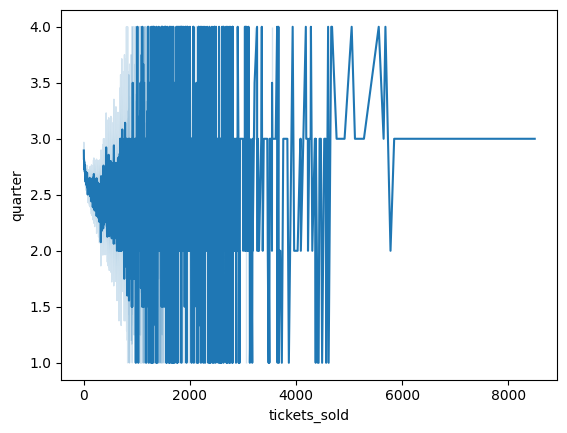

In [24]:
sns.lineplot(data=data,x='tickets_sold',y='quarter')
plt.show()

In [37]:
X = data[['ticket_price', 'occu_perc', 'show_time', 'tickets_sold','ticket_use','capacity']]
Y = data['total_sales']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [41]:
y_pred=lr.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test, y_pred)
r_squared

0.8683180079642774

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled,Y_train)

Ridge()

In [46]:
from sklearn.metrics import mean_squared_error
ridge_pred=ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(Y_test, ridge_pred)
print(f'Ridge Mean Squared Error: {ridge_mse}')

Ridge Mean Squared Error: 112027166175365.75


In [47]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.032e+18, tolerance: 9.730e+15
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [48]:
lasso_pred=lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(Y_test, lasso_pred)
print(f'Lasso Mean Squared Error: {lasso_mse}')

Lasso Mean Squared Error: 112016630080558.22
